In [1]:
# Import necessary libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder, StandardScaler
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score
from sklearn.feature_selection import SelectKBest, f_classif


import warnings
warnings.filterwarnings('ignore')

ModuleNotFoundError: No module named 'sklearn'

In [ ]:
!pip install --upgrade --force-reinstall scikit-learn


In [ ]:
!pip install scikit-learn


In [ ]:
!pip install --upgrade --force-reinstall scikit-learn


In [2]:
# Set style for plots
sns.set_style('whitegrid')
%matplotlib inline

In [3]:
# Load the dataset
df = pd.read_csv('JEE_Dropout_After_Class_12.csv')

In [4]:
# Display first few rows
print("First 5 rows of the dataset:")
display(df.head())

First 5 rows of the dataset:


,jee_main_score,jee_advanced_score,mock_test_score_avg,school_board,class_12_percent,attempt_count,coaching_institute,daily_study_hours,family_income,parent_education,location_type,peer_pressure_level,mental_health_issues,admission_taken,dropout
0,78.95,59.22,59.86,CBSE,70.09,1,FIITJEE,5.4,Low,Upto 10th,Urban,Low,No,No,1
1,70.06,58.75,64.33,State,78.00,1,FIITJEE,5.5,Mid,Upto 10th,Urban,Low,Yes,No,0
2,81.07,37.27,60.83,ICSE,64.36,1,FIITJEE,7.0,Low,PG,Semi-Urban,Medium,Yes,No,1
3,93.32,60.72,69.33,ICSE,73.21,1,FIITJEE,2.1,Low,12th,Semi-Urban,Medium,Yes,Yes,0
4,68.72,77.73,82.37,CBSE,89.02,1,Allen,6.3,Mid,Graduate,Semi-Urban,High,No,Yes,0


In [5]:
# Basic information about the dataset
print("\nDataset information:")
df.info()


Dataset information:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5000 entries, 0 to 4999
Data columns (total 15 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   jee_main_score        5000 non-null   float64
 1   jee_advanced_score    5000 non-null   float64
 2   mock_test_score_avg   5000 non-null   float64
 3   school_board          5000 non-null   object 
 4   class_12_percent      5000 non-null   float64
 5   attempt_count         5000 non-null   int64  
 6   coaching_institute    3791 non-null   object 
 7   daily_study_hours     5000 non-null   float64
 8   family_income         5000 non-null   object 
 9   parent_education      5000 non-null   object 
 10  location_type         5000 non-null   object 
 11  peer_pressure_level   5000 non-null   object 
 12  mental_health_issues  5000 non-null   object 
 13  admission_taken       5000 non-null   object 
 14  dropout               5000 non-null   int64  
dtyp

In [6]:
# Descriptive statistics
print("\nDescriptive statistics:")
display(df.describe())


Descriptive statistics:


,jee_main_score,jee_advanced_score,mock_test_score_avg,class_12_percent,attempt_count,daily_study_hours,dropout
count,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000
mean,71.961226,65.736404,68.110756,74.957400,1.504600,4.483860,0.207200
std,13.668497,15.909248,11.938849,9.885309,0.500029,1.984723,0.405341
min,26.620000,3.240000,27.490000,50.000000,1.000000,0.000000,0.000000
25%,62.790000,55.017500,60.070000,68.067500,1.000000,3.100000,0.000000
50%,72.190000,65.720000,68.120000,74.940000,2.000000,4.500000,0.000000
75%,81.322500,76.835000,76.110000,81.842500,2.000000,5.900000,0.000000
max,100.000000,100.000000,100.000000,100.000000,2.000000,10.000000,1.000000


In [7]:
# Check for missing values
print("\nMissing values count:")
display(df.isnull().sum())


Missing values count:


jee_main_score             0
jee_advanced_score         0
mock_test_score_avg        0
school_board               0
class_12_percent           0
attempt_count              0
coaching_institute      1209
daily_study_hours          0
family_income              0
parent_education           0
location_type              0
peer_pressure_level        0
mental_health_issues       0
admission_taken            0
dropout                    0
dtype: int64

In [8]:
# 2. Data Cleaning

In [9]:
# Check for duplicates
print(f"\nNumber of duplicate rows: {df.duplicated().sum()}")

# Convert categorical columns to appropriate data types
categorical_cols = ['school_board', 'family_income', 'parent_education', 
                   'location_type', 'peer_pressure_level', 'mental_health_issues',
                   'admission_taken', 'coaching_institute']

for col in categorical_cols:
    df[col] = df[col].astype('category')


Number of duplicate rows: 0


In [10]:
# Verify changes
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5000 entries, 0 to 4999
Data columns (total 15 columns):
 #   Column                Non-Null Count  Dtype   
---  ------                --------------  -----   
 0   jee_main_score        5000 non-null   float64 
 1   jee_advanced_score    5000 non-null   float64 
 2   mock_test_score_avg   5000 non-null   float64 
 3   school_board          5000 non-null   category
 4   class_12_percent      5000 non-null   float64 
 5   attempt_count         5000 non-null   int64   
 6   coaching_institute    3791 non-null   category
 7   daily_study_hours     5000 non-null   float64 
 8   family_income         5000 non-null   category
 9   parent_education      5000 non-null   category
 10  location_type         5000 non-null   category
 11  peer_pressure_level   5000 non-null   category
 12  mental_health_issues  5000 non-null   category
 13  admission_taken       5000 non-null   category
 14  dropout               5000 non-null   int64   
dtypes: c

In [11]:
# 3. Exploratory Data Analysis (EDA)

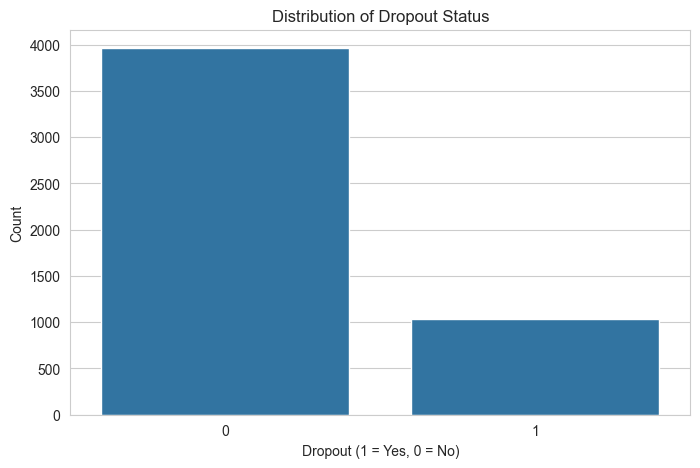

In [12]:
# 3.1 Target Variable Analysis
plt.figure(figsize=(8, 5))
sns.countplot(x='dropout', data=df)
plt.title('Distribution of Dropout Status')
plt.xlabel('Dropout (1 = Yes, 0 = No)')
plt.ylabel('Count')
plt.show()

In [13]:
# Percentage distribution
dropout_perc = df['dropout'].value_counts(normalize=True) * 100
print("\nDropout percentage:")
display(dropout_perc)


Dropout percentage:


dropout
0    79.28
1    20.72
Name: proportion, dtype: float64

In [14]:
# 3.2 Numerical Features Analysis
numerical_cols = ['jee_main_score', 'jee_advanced_score', 'mock_test_score_avg', 
                 'class_12_percent', 'attempt_count', 'daily_study_hours']

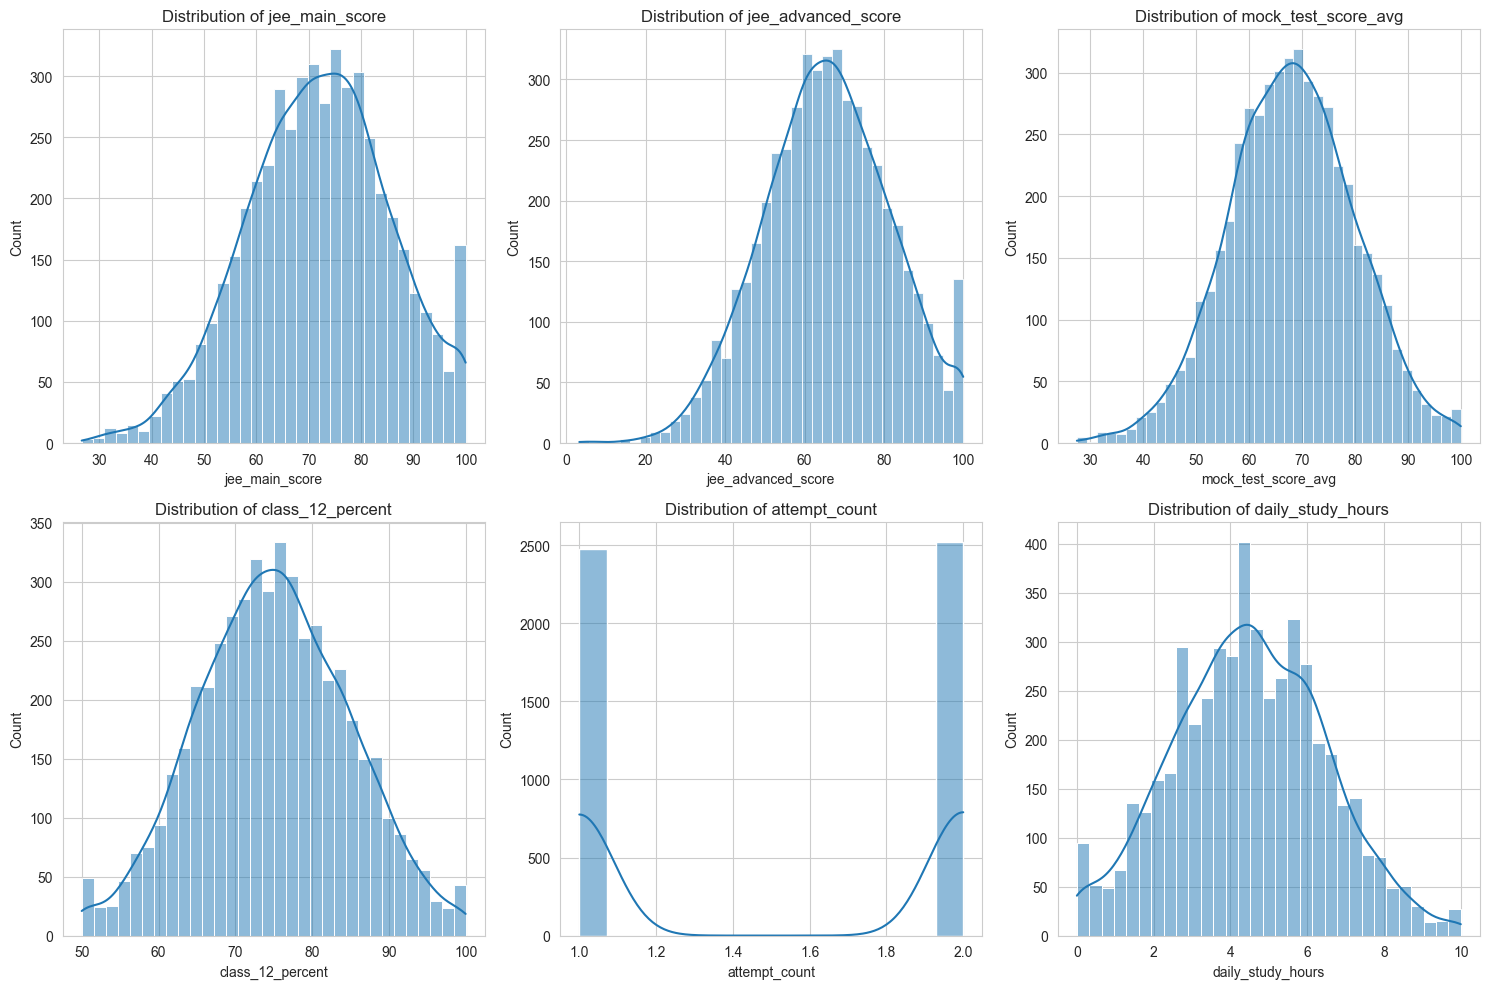

In [15]:
# Plot distributions
plt.figure(figsize=(15, 10))
for i, col in enumerate(numerical_cols, 1):
    plt.subplot(2, 3, i)
    sns.histplot(df[col], kde=True)
    plt.title(f'Distribution of {col}')
plt.tight_layout()
plt.show()

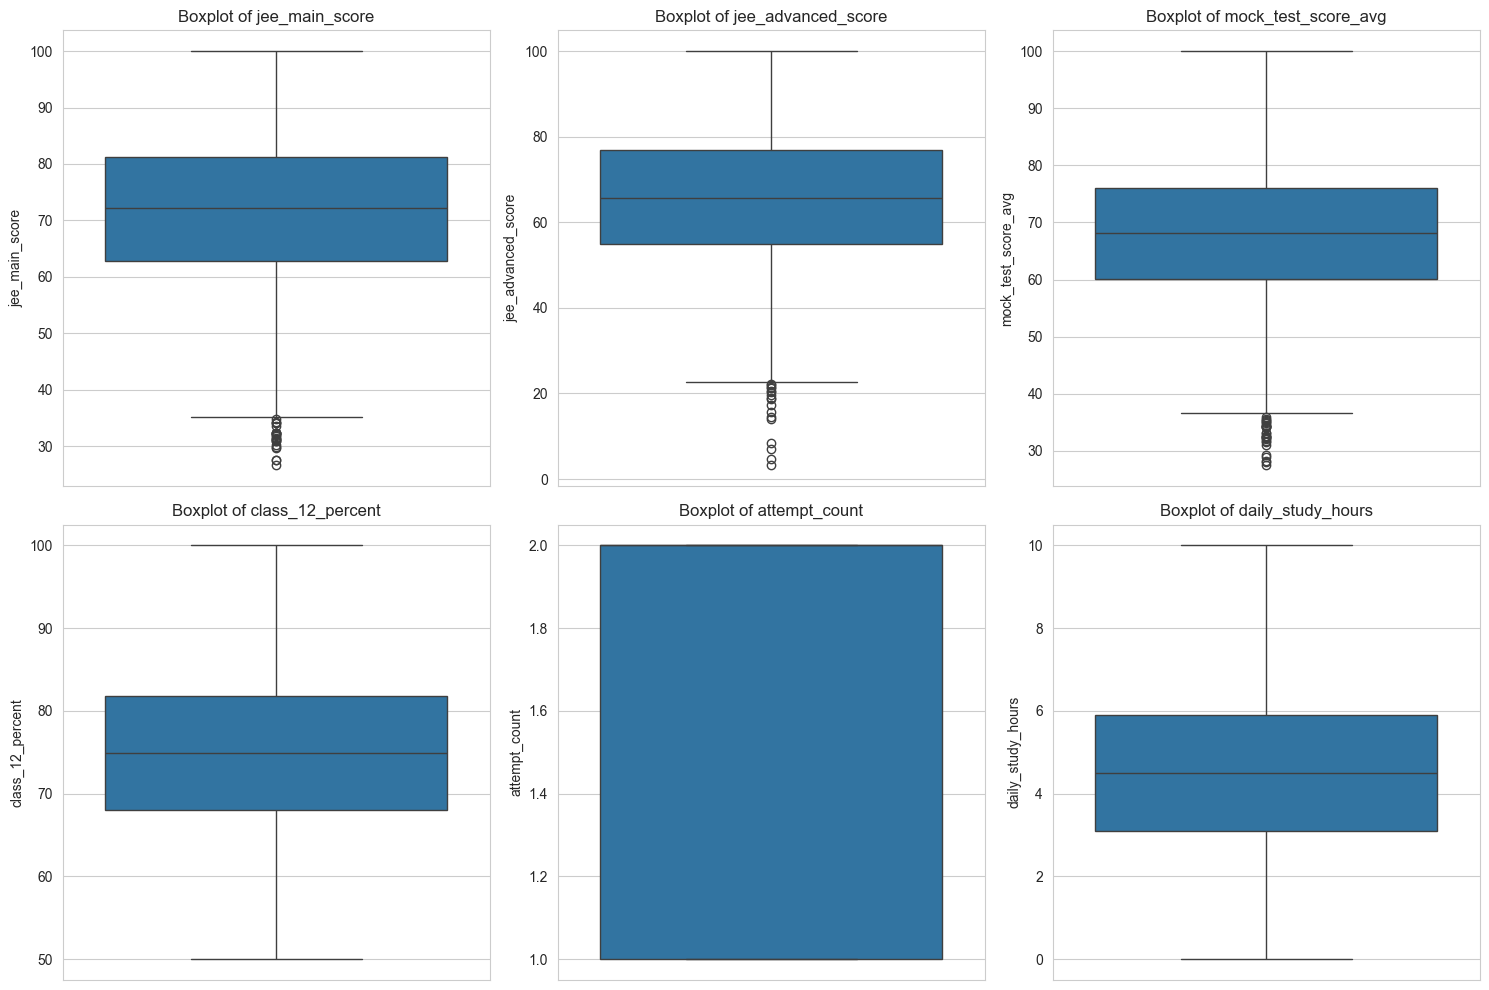

In [16]:
# Boxplots to identify outliers
plt.figure(figsize=(15, 10))
for i, col in enumerate(numerical_cols, 1):
    plt.subplot(2, 3, i)
    sns.boxplot(y=df[col])
    plt.title(f'Boxplot of {col}')
plt.tight_layout()
plt.show()

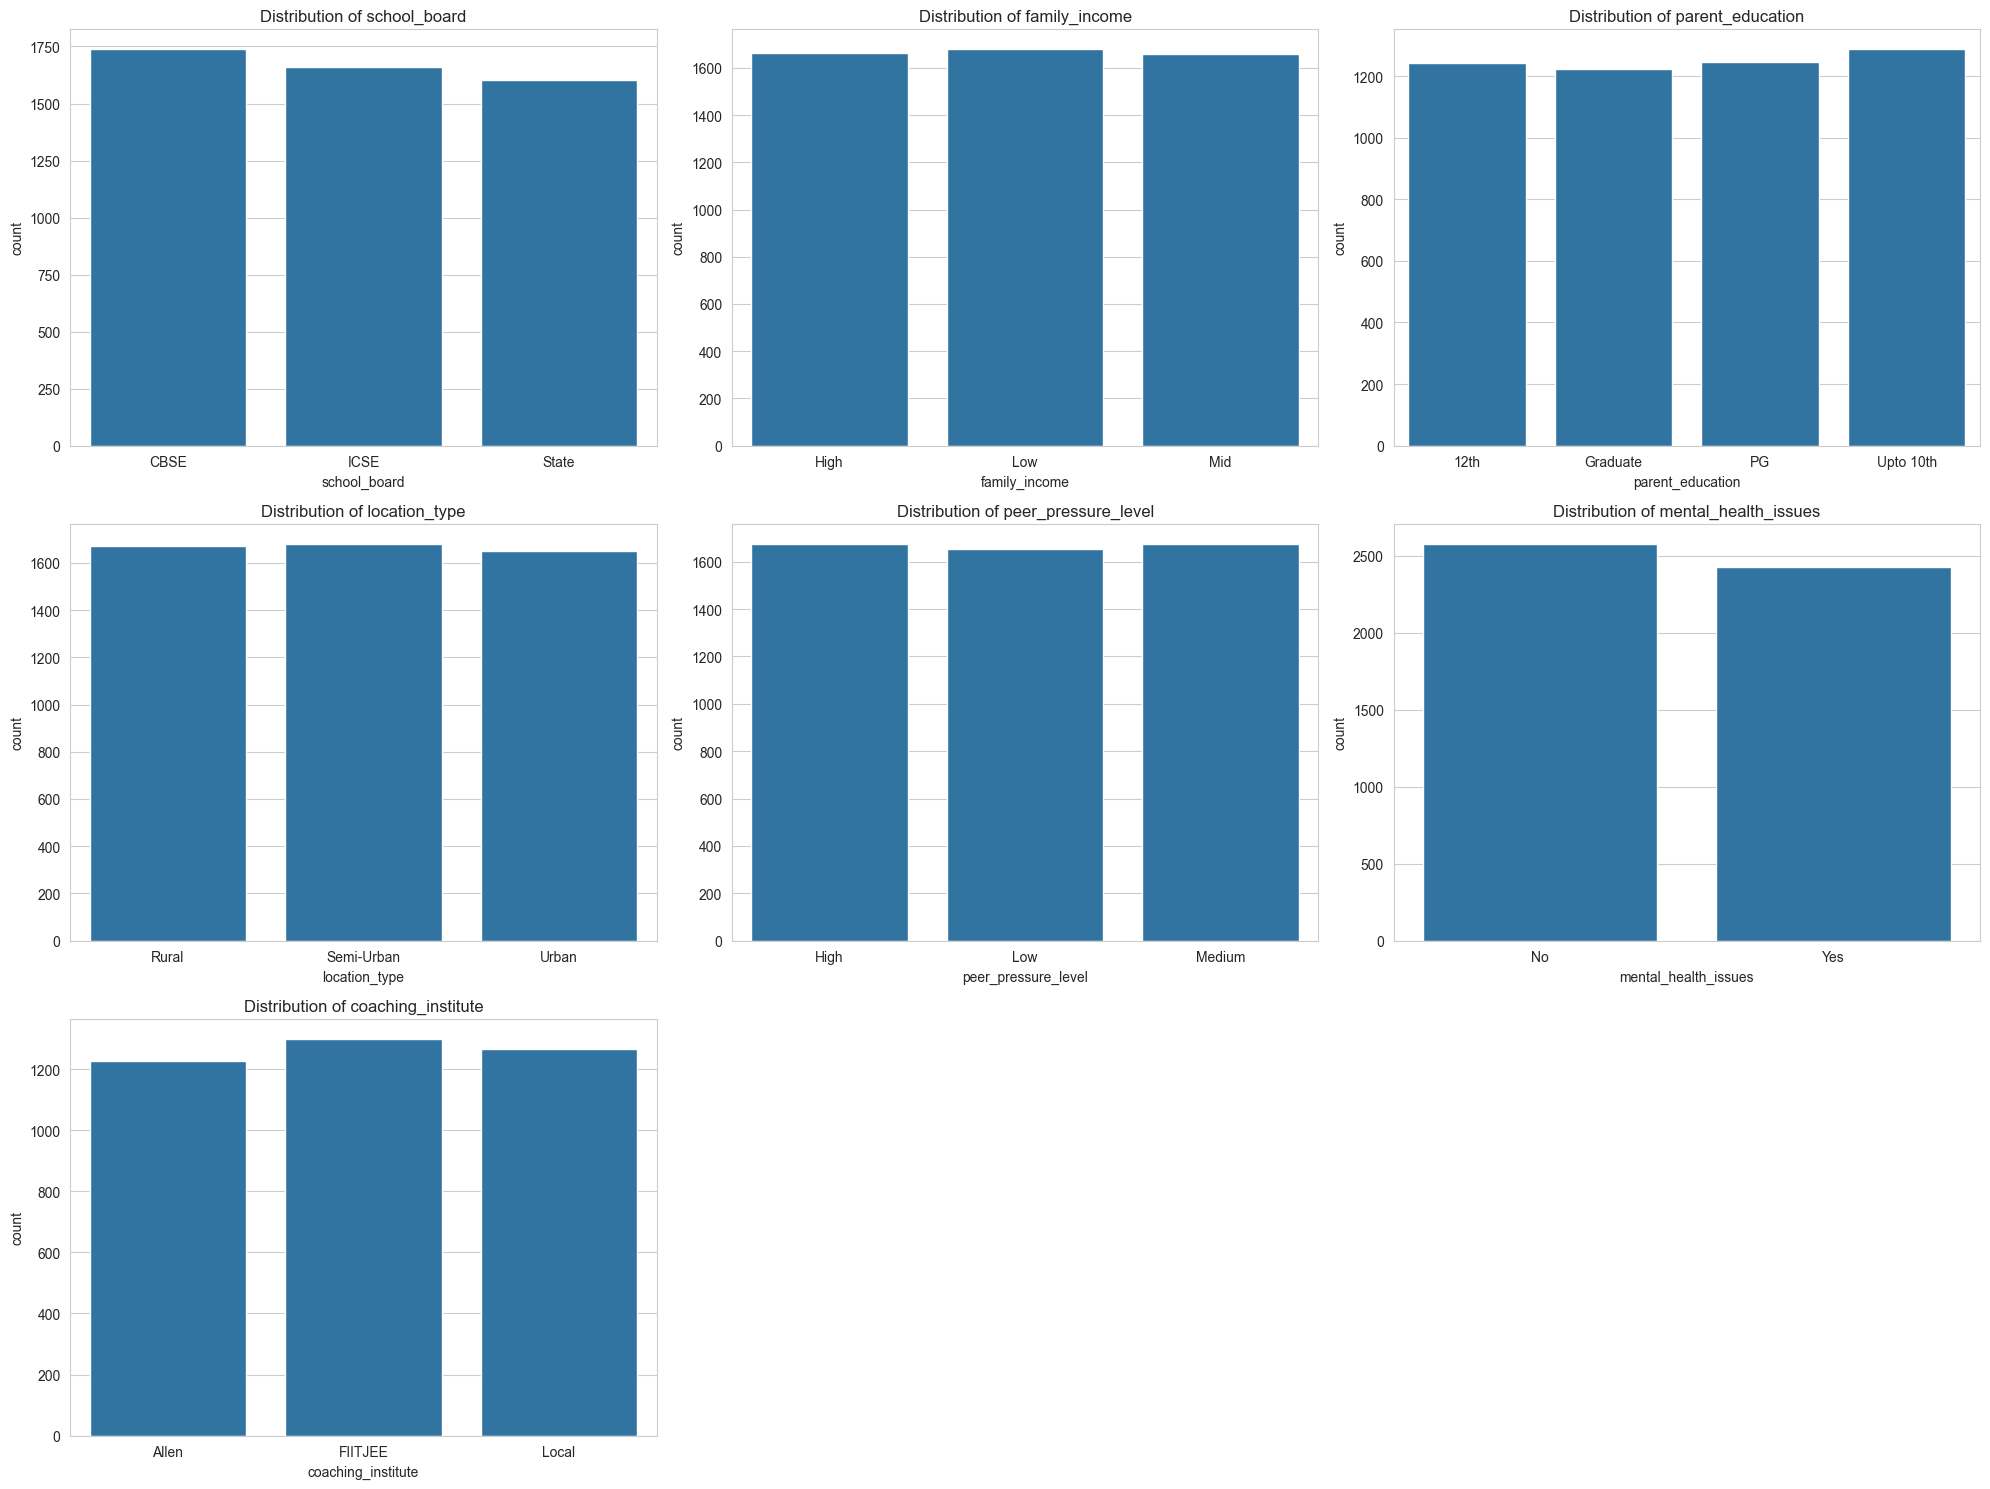

In [17]:
# 3.3 Categorical Features Analysis
categorical_cols.remove('admission_taken')  # Already analyzed target variable

plt.figure(figsize=(20, 15))
for i, col in enumerate(categorical_cols, 1):
    plt.subplot(3, 3, i)
    if df[col].nunique() > 5:  # For coaching_institute which has more categories
        sns.countplot(y=col, data=df, order=df[col].value_counts().index)
    else:
        sns.countplot(x=col, data=df)
    plt.title(f'Distribution of {col}')
plt.tight_layout()
plt.show()

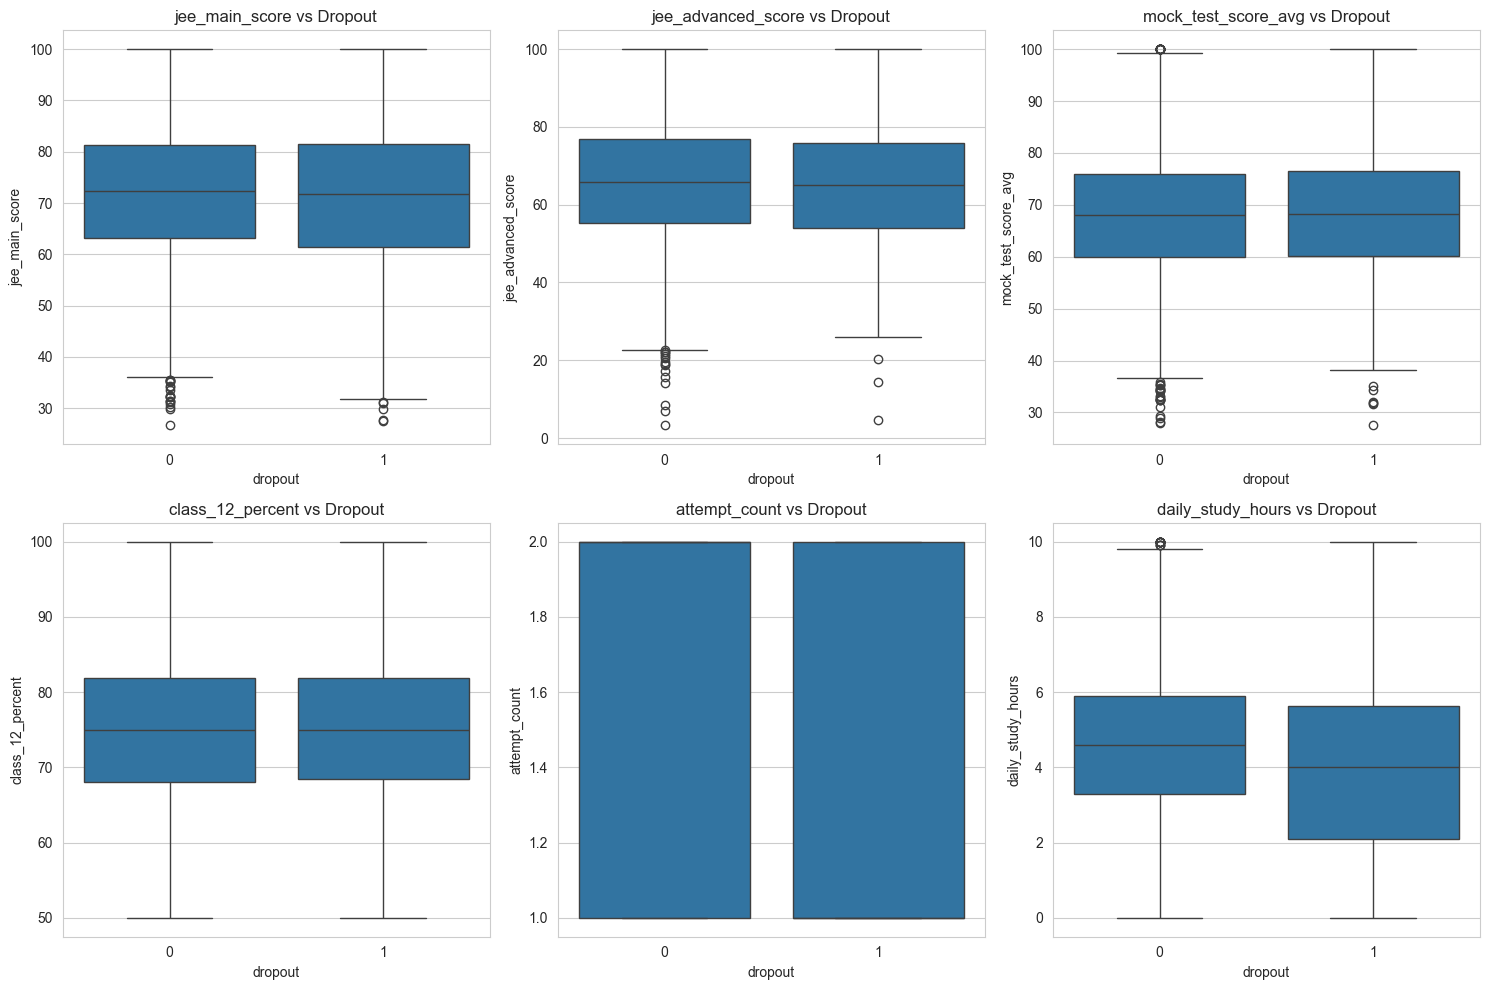

In [18]:
# 3.4 Relationship Between Features and Target
# Numerical features vs dropout
plt.figure(figsize=(15, 10))
for i, col in enumerate(numerical_cols, 1):
    plt.subplot(2, 3, i)
    sns.boxplot(x='dropout', y=col, data=df)
    plt.title(f'{col} vs Dropout')
plt.tight_layout()
plt.show()

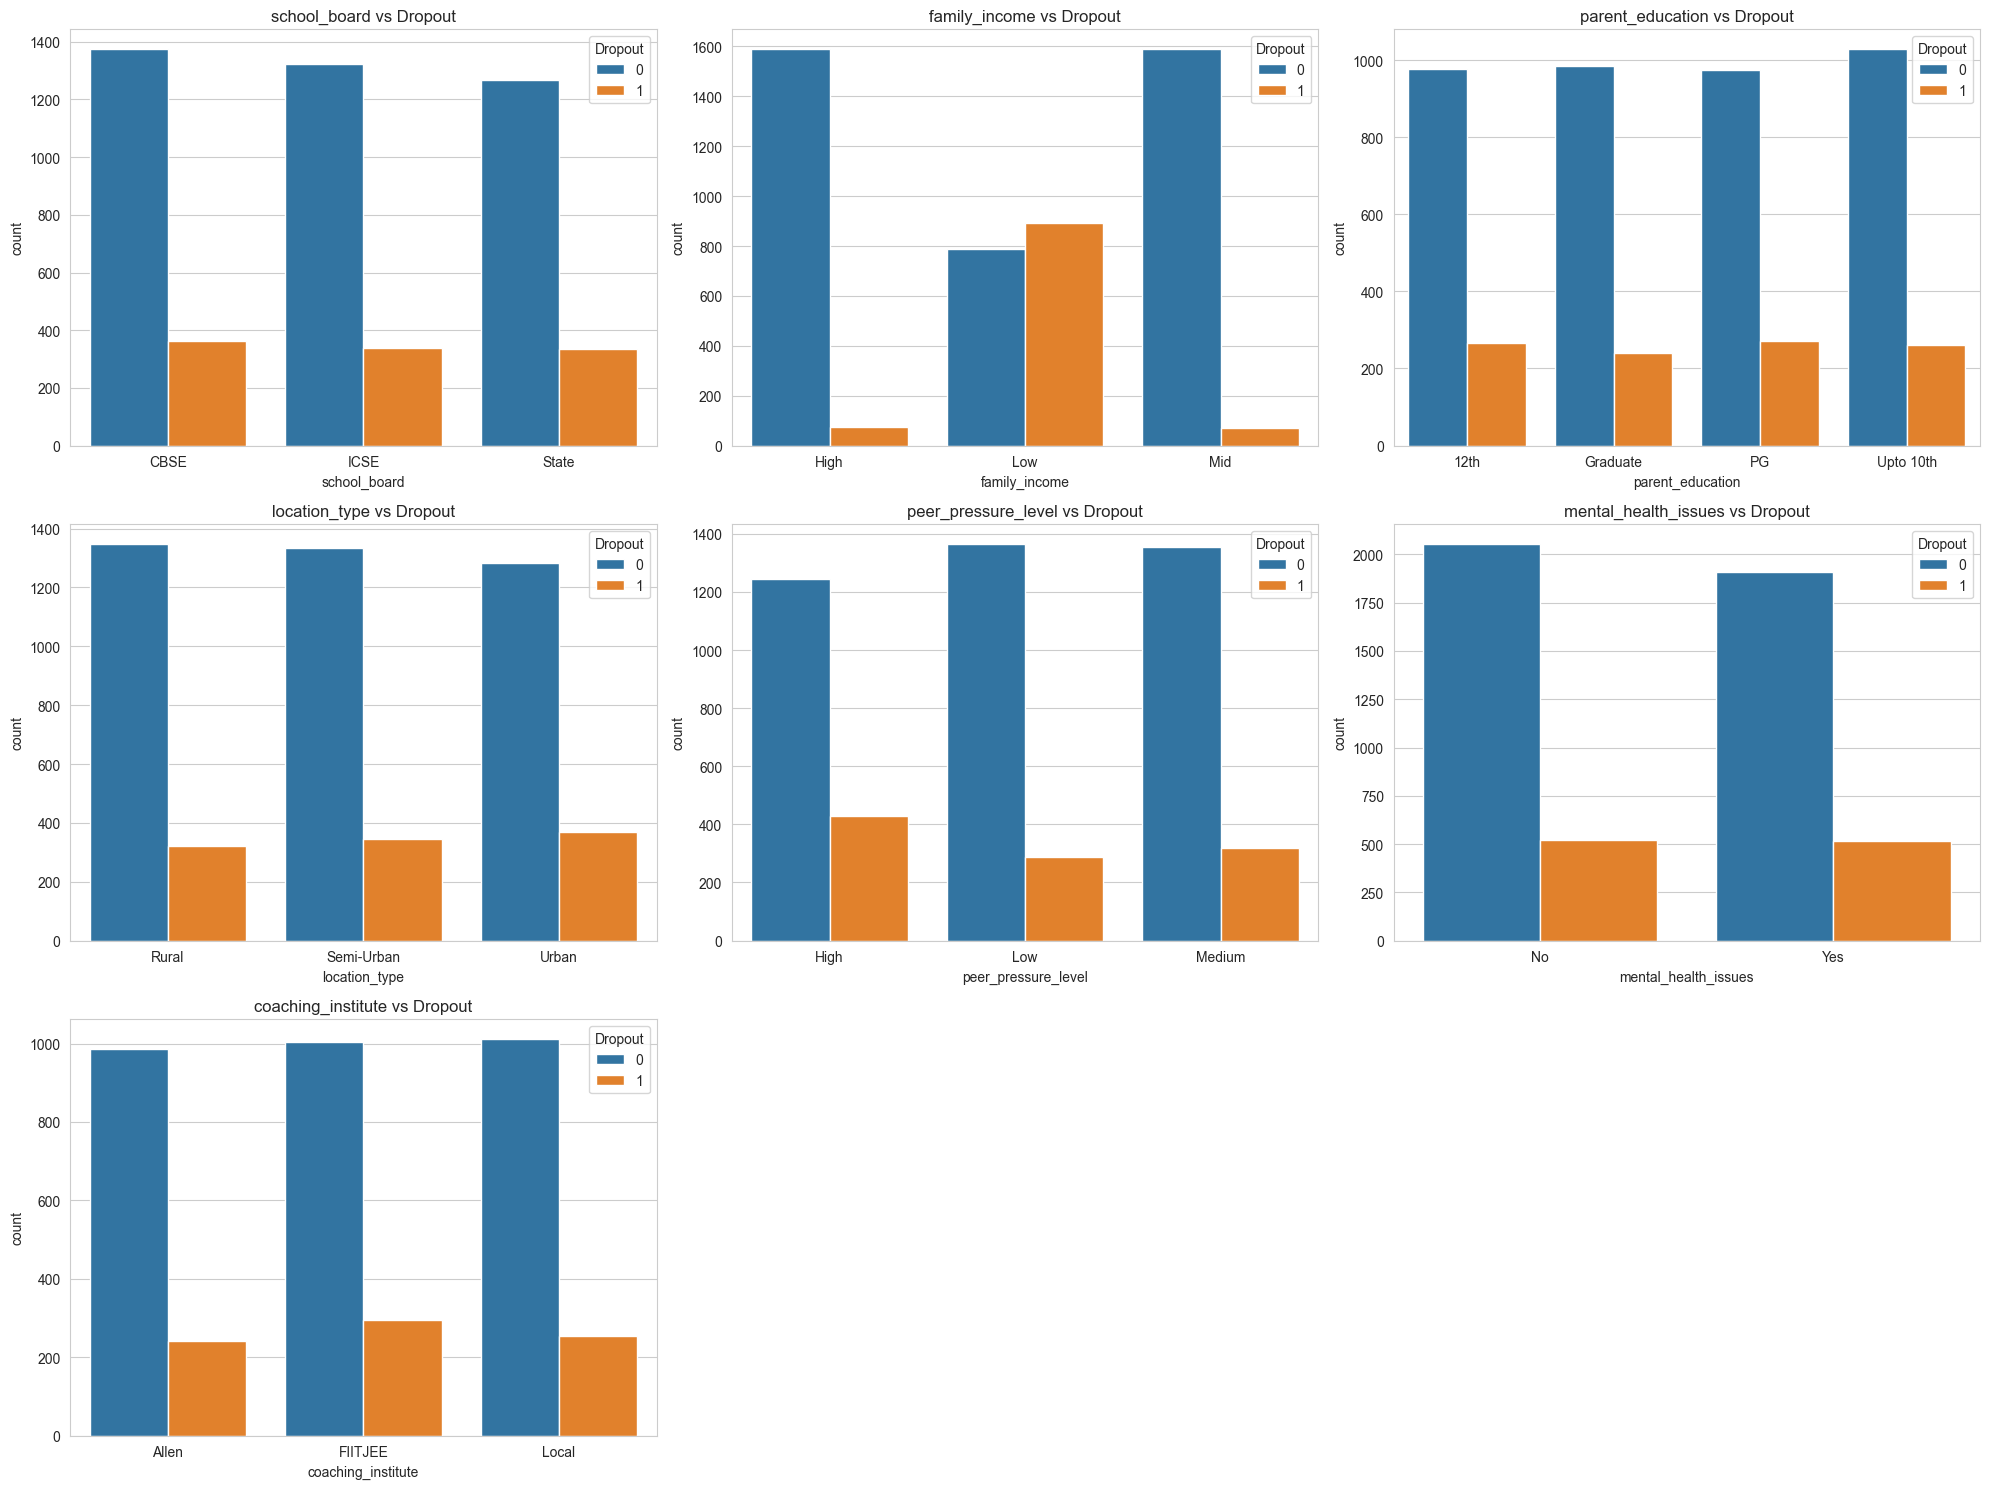

In [19]:
# Categorical features vs dropout
plt.figure(figsize=(20, 15))
for i, col in enumerate(categorical_cols, 1):
    plt.subplot(3, 3, i)
    sns.countplot(x=col, hue='dropout', data=df)
    plt.title(f'{col} vs Dropout')
    plt.legend(title='Dropout', loc='upper right')
plt.tight_layout()
plt.show()

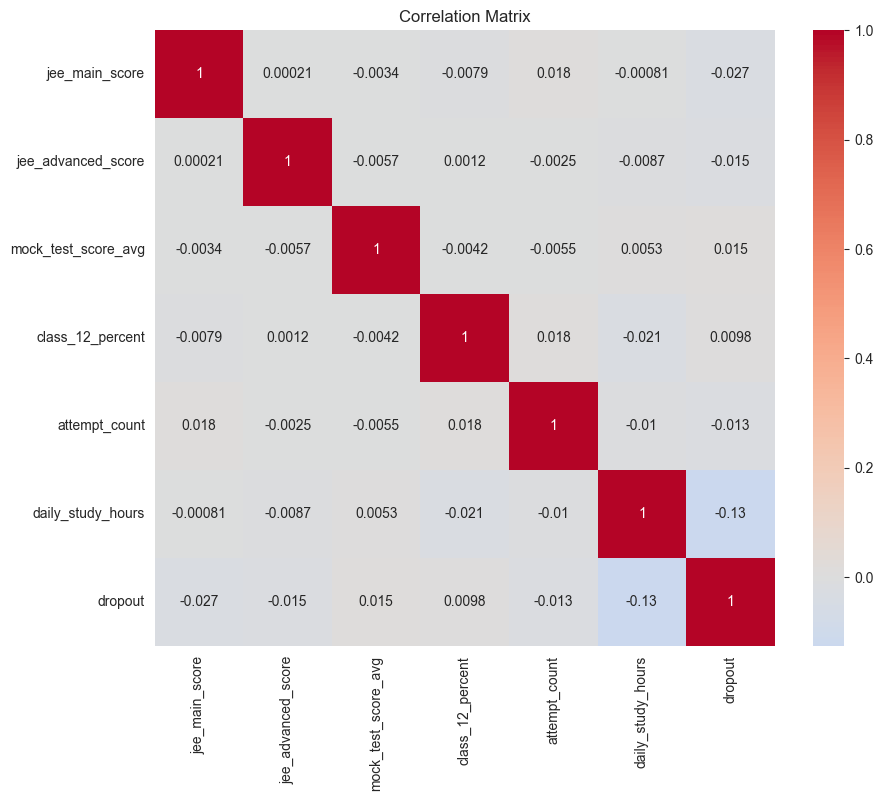

In [20]:
# 4. Feature Engineering

### 4.1 Correlation Analysis
# Calculate correlation matrix
corr_matrix = df[numerical_cols + ['dropout']].corr()

# Plot heatmap
plt.figure(figsize=(10, 8))
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', center=0)
plt.title('Correlation Matrix')
plt.show()

In [21]:
# 4.2 Feature Importance
# Prepare data for feature importance analysis
X = df.drop('dropout', axis=1)
y = df['dropout']

# Encode categorical variables
encoder = LabelEncoder()
for col in categorical_cols:
    X[col] = encoder.fit_transform(X[col])

NameError: name 'LabelEncoder' is not defined

In [22]:

# Feature selection
selector = SelectKBest(score_func=f_classif, k='all')
selector.fit(X, y)

# Get scores and p-values
feature_scores = pd.DataFrame({
    'Feature': X.columns,
    'Score': selector.scores_,
    'P-value': selector.pvalues_
}).sort_values('Score', ascending=False)

print("\nFeature importance scores:")
display(feature_scores)

NameError: name 'SelectKBest' is not defined

In [23]:
# 4.3 Create New Features
# Create a performance ratio feature
df['performance_ratio'] = df['jee_advanced_score'] / df['jee_main_score']

# Create a study efficiency feature
df['study_efficiency'] = df['mock_test_score_avg'] / df['daily_study_hours']

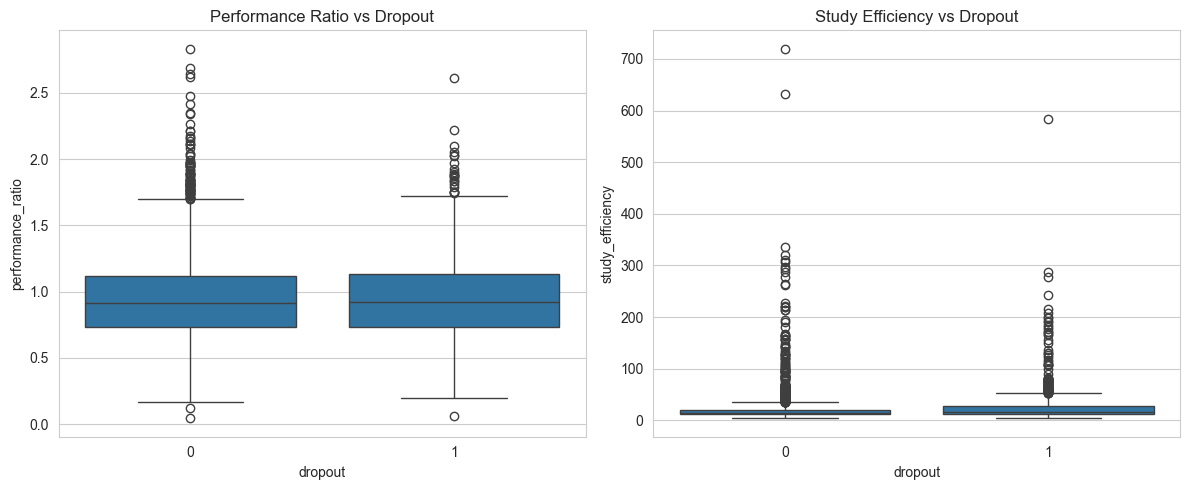

In [24]:

# Check new features
plt.figure(figsize=(12, 5))
plt.subplot(1, 2, 1)
sns.boxplot(x='dropout', y='performance_ratio', data=df)
plt.title('Performance Ratio vs Dropout')

plt.subplot(1, 2, 2)
sns.boxplot(x='dropout', y='study_efficiency', data=df)
plt.title('Study Efficiency vs Dropout')
plt.tight_layout()
plt.show()

In [25]:
# 5. Predictive Modeling

### 5.1 Data Preparation
# Select features and target
features = numerical_cols + categorical_cols + ['performance_ratio', 'study_efficiency']
X = df[features]
y = df['dropout']

# Encode categorical variables
for col in categorical_cols:
    X[col] = encoder.fit_transform(X[col])

NameError: name 'encoder' is not defined

In [26]:
# Scale numerical features
scaler = StandardScaler()
X[numerical_cols] = scaler.fit_transform(X[numerical_cols])

# Split data into train and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42, stratify=y)

NameError: name 'StandardScaler' is not defined

In [27]:
# 5.2 Model Training
# Initialize and train Random Forest classifier
rf = RandomForestClassifier(n_estimators=100, random_state=42)
rf.fit(X_train, y_train)

NameError: name 'RandomForestClassifier' is not defined

In [28]:
# 5.3 Model Evaluation
# Predictions
y_pred = rf.predict(X_test)

# Evaluation metrics
print("\nModel Evaluation:")
print(f"Accuracy: {accuracy_score(y_test, y_pred):.2f}")
print("\nClassification Report:")
print(classification_report(y_test, y_pred))

NameError: name 'rf' is not defined

In [29]:
# Confusion matrix
plt.figure(figsize=(6, 4))
sns.heatmap(confusion_matrix(y_test, y_pred), annot=True, fmt='d', cmap='Blues')
plt.title('Confusion Matrix')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.show()

NameError: name 'confusion_matrix' is not defined

<Figure size 600x400 with 0 Axes>

In [30]:
# 5.4 Feature Importance from Model
# Get feature importances
importances = rf.feature_importances_
feature_importance = pd.DataFrame({
    'Feature': X.columns,
    'Importance': importances
}).sort_values('Importance', ascending=False)

NameError: name 'rf' is not defined

In [31]:
# Plot feature importance
plt.figure(figsize=(10, 6))
sns.barplot(x='Importance', y='Feature', data=feature_importance)
plt.title('Feature Importance from Random Forest')
plt.show()

NameError: name 'feature_importance' is not defined

<Figure size 1000x600 with 0 Axes>

In [32]:
# 6. Insights and Recommendations

### Key Insights
print("\nKey Insights:")
print("1. Dropout rate is approximately", round(dropout_perc[1], 2), "% of students.")
print("2. Top factors influencing dropout:")
for i, row in feature_importance.head(5).iterrows():
    print(f"   - {row['Feature']} (importance: {row['Importance']:.3f})")
print("3. Students with lower JEE Main scores, lower mock test averages, and fewer study hours are more likely to drop out.")
print("4. Mental health issues and peer pressure show significant correlation with dropout rates.")


Key Insights:
1. Dropout rate is approximately 20.72 % of students.
2. Top factors influencing dropout:


NameError: name 'feature_importance' is not defined

In [33]:
### Recommendations
print("\nRecommendations:")
print("1. Focus on students with JEE Main scores below 70 and mock test averages below 65 for early intervention.")
print("2. Provide additional support for students with mental health issues.")
print("3. Implement study efficiency programs to help students maximize their learning from study hours.")
print("4. Offer counseling for students experiencing high peer pressure.")
print("5. Monitor students who attempt JEE multiple times as they show higher dropout tendencies.")


Recommendations:
1. Focus on students with JEE Main scores below 70 and mock test averages below 65 for early intervention.
2. Provide additional support for students with mental health issues.
3. Implement study efficiency programs to help students maximize their learning from study hours.
4. Offer counseling for students experiencing high peer pressure.
5. Monitor students who attempt JEE multiple times as they show higher dropout tendencies.
